# Exploratory Data Analysis

In [14]:
# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from pandarallel import pandarallel
pandarallel.initialize(progress_bar=False)


from us_state_abbrev import us_state_abbrev, abbrev_us_state
%matplotlib inline
# %%
datap = Path('../Data')  # set the data path


INFO: Pandarallel will run on 24 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [15]:
# import
dfin = pd.read_parquet(datap/'merged_df.parquet.gzip')
dfin

,State,County,Diversity-Index,"Black or African American alone, percent, 2013","American Indian and Alaska Native alone, percent, 2013","Asian alone, percent, 2013","Native Hawaiian and Other Pacific Islander alone, percent,","Two or More Races, percent, 2013","Hispanic or Latino, percent, 2013","White alone, not Hispanic or Latino, percent, 2013",...,Murder and _nonnegligent _manslaughter,Rape_(revised _definition)1,Rape_(legacy_definition)2,Robbery,Aggravated _assault,Property _crime,Burglary,Larceny-_theft,Motor _vehicle _theft,Arson3
0,AL,Autauga,0.388898,18.4,0.5,1.1,0.1,1.7,2.7,75.9,...,0.0,15.0,NaN,3.0,54.0,444.0,160.0,238.0,46.0,NaN
1,AL,Baldwin,0.297942,9.5,0.7,0.9,0.1,1.5,4.6,83.1,...,0.0,13.0,NaN,27.0,71.0,674.0,250.0,380.0,44.0,NaN
2,AL,Barbour,0.556605,47.6,0.6,0.5,0.2,0.9,4.8,46.3,...,1.0,2.0,NaN,2.0,16.0,115.0,43.0,63.0,9.0,NaN
3,AL,Bibb,0.394100,22.1,0.4,0.2,0.1,0.9,2.1,74.6,...,0.0,0.0,NaN,0.0,8.0,123.0,65.0,40.0,18.0,NaN
4,AL,Blount,0.221056,1.8,0.6,0.3,0.1,1.1,8.7,87.8,...,0.0,9.0,NaN,0.0,82.0,947.0,302.0,562.0,83.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418,WY,Platte,0.197897,0.9,0.7,0.5,0.2,1.4,7.8,89.2,...,0.0,NaN,0.0,0.0,2.0,36.0,16.0,17.0,3.0,0.0
2419,WY,Sheridan,0.162154,1.2,1.4,0.8,0.1,1.4,4.3,91.4,...,0.0,NaN,0.0,0.0,1.0,39.0,7.0,30.0,2.0,1.0
2420,WY,Sublette,0.218882,1.4,1.1,1.1,0.0,1.4,7.8,88.0,...,0.0,NaN,1.0,0.0,13.0,119.0,13.0,101.0,5.0,0.0
2421,WY,Sweetwater,0.340296,1.7,1.2,0.9,0.2,1.7,15.9,79.6,...,0.0,NaN,2.0,0.0,18.0,111.0,25.0,73.0,13.0,3.0


In [16]:
dfin.columns

Index(['State', 'County', 'Diversity-Index',
       'Black or African American alone, percent, 2013',
       'American Indian and Alaska Native alone, percent, 2013',
       'Asian alone, percent, 2013',
       'Native Hawaiian and Other Pacific Islander alone, percent,',
       'Two or More Races, percent, 2013', 'Hispanic or Latino, percent, 2013',
       'White alone, not Hispanic or Latino, percent, 2013', 'Violent_Crime',
       'Murder and _nonnegligent _manslaughter', 'Rape_(revised _definition)1',
       'Rape_(legacy_definition)2', 'Robbery', 'Aggravated _assault',
       'Property _crime', 'Burglary', 'Larceny-_theft',
       'Motor _vehicle _theft', 'Arson3'],
      dtype='object')

In [17]:
df = dfin[['State', 'County', 'Diversity-Index', 'Violent_Crime']]
df.head(3)

,State,County,Diversity-Index,Violent_Crime
0,AL,Autauga,0.388898,72.0
1,AL,Baldwin,0.297942,111.0
2,AL,Barbour,0.556605,21.0


In [18]:
# group by state and sort by AVG diversity
df_gb_state_d = df[['State', 'Diversity-Index']].groupby('State').parallel_apply(np.mean)
df_gb_state_d.head()

,Diversity-Index
State,
AL,0.403952
AR,0.314315
AZ,0.500013
CA,0.512964
CO,0.350737


In [19]:
# group by state and sort by TOTAL number of violent crimes
df_gb_state_v = df[['State', 'Violent_Crime']].groupby('State').sum()
df_gb_state_v.head()


,Violent_Crime
State,
AL,3531.0
AR,2649.0
AZ,2896.0
CA,24038.0
CO,2311.0


In [20]:
# merge the two dataframes 
df_gb_state = df_gb_state_d.merge(df_gb_state_v, on='State', how='inner')
df_gb_state.head()

,Diversity-Index,Violent_Crime
State,,
AL,0.403952,3531.0
AR,0.314315,2649.0
AZ,0.500013,2896.0
CA,0.512964,24038.0
CO,0.350737,2311.0


<br>
<br>

## Plot: Diversity Index by State

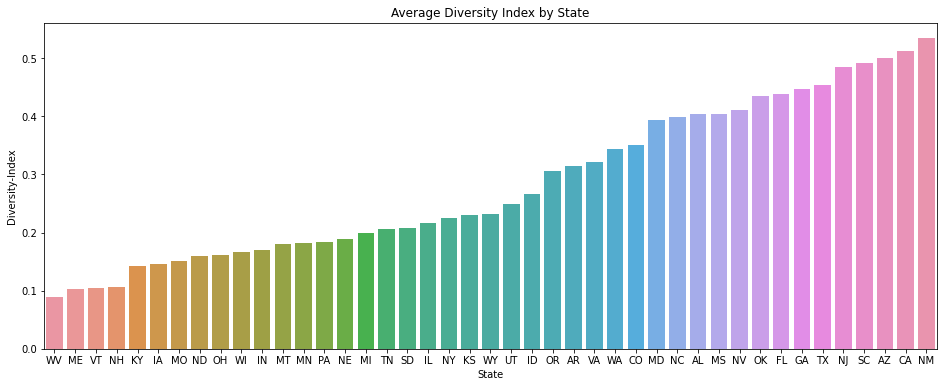

In [21]:
df_gb_state = df_gb_state.sort_values('Diversity-Index')

plt.figure(figsize=[16,6])
sns.barplot(x=df_gb_state.index, y=df_gb_state['Diversity-Index'])
plt.title('Average Diversity Index by State')
plt.show()

<br>
<br>

## Plot: Violent Crime by State

Note that this is a histogram of the raw data and it hasn't been corrected for population differences yet

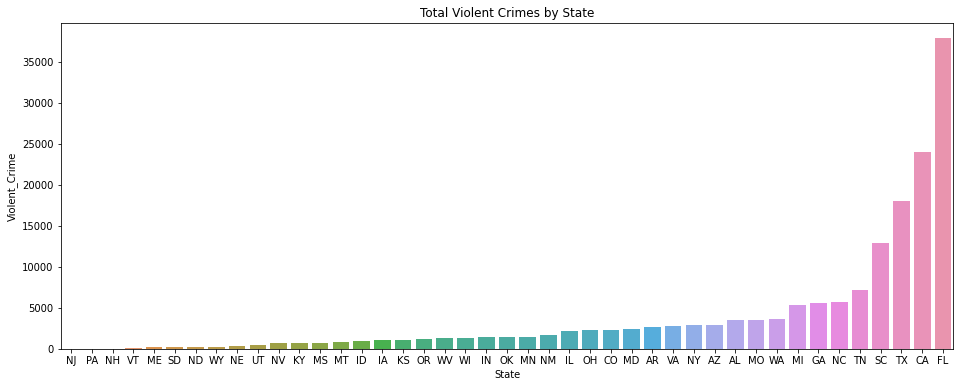

In [22]:
df_gb_state = df_gb_state.sort_values(by='Violent_Crime')

plt.figure(figsize=[16,6])

sns.barplot(x=df_gb_state.index, y=df_gb_state['Violent_Crime'])
plt.title('Total Violent Crimes by State')
plt.show()